# Minimal LGBM regressor

A simple LGBM ecfp4 model implemented in pure scikit-learn + datamol for protyping purposes

In [1]:
import numpy as np
import pandas as pd

from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from molfeat.trans import MoleculeTransformer
from molfeat.trans.fp import FPVecTransformer
import datamol as dm
from sklearn.model_selection import GridSearchCV


In [2]:
CYP3A4_chembl_pchembl = '../tests/test_data/CYP3A4_chembl_pchembl.csv'
data = pd.read_csv(CYP3A4_chembl_pchembl)

In [3]:
data.head()

,CANONICAL_SMILES,INCHIKEY,pChEMBL mean,pChEMBL std,common_name,appears_in_N_ChEMBL_assays,action_type,dataset,active
0,CC(=O)N1CCN(c2ccc(OCC3COC(Cn4ccnc4)(c4ccc(Cl)c...,XMAYWYJOQHXEEK-UHFFFAOYSA-N,7.013500,0.618796,KETOCONAZOLE,21,NaN,ChEMBL_curated,True
1,CCC1C(=O)OC[C@H]1Cc1cncn1C,QCHFTSOMWOSFHM-HNHGDDPOSA-N,5.052941,0.285302,SALAGEN,17,NaN,ChEMBL_curated,True
2,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,VNFPBHJOKIVQEB-UHFFFAOYSA-N,7.237692,0.358798,CLOTRIMAZOLE,14,NaN,ChEMBL_curated,True
3,CNCCCC12CCC(c3ccccc31)c1ccccc12,QSLMDECMDJKHMQ-UHFFFAOYSA-N,5.473846,0.281470,MAPROTILINE HYDROCHLORIDE,13,NaN,ChEMBL_curated,True
4,Clc1ccc(COC(Cn2ccnc2)c2ccc(Cl)cc2Cl)c(Cl)c1,BYBLEWFAAKGYCD-UHFFFAOYSA-N,6.060000,0.608590,MICONAZOLE NITRATE,12,NaN,ChEMBL_curated,True


In [4]:
X = data["CANONICAL_SMILES"]
y = data["pChEMBL mean"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y)


In [6]:
vec_featurizer = FPVecTransformer("ecfp:4", dtype=np.float32)
trans = MoleculeTransformer(
            vec_featurizer,
            n_jobs=-1,
            dtype=np.float32,
            parallel_kwargs={"progress": True},
            verbose=False,
        )

In [7]:
with dm.without_rdkit_log():
    X_train_feat, _ =  trans(X_train, ignore_errors=True)
    X_test_feat, _ = trans(X_test, ignore_errors=True)


/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 5964/5964 [00:01<00:00, 3244.01it/s]
/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be remov

In [8]:
regressor = LGBMRegressor()

In [9]:
X_train_feat = np.squeeze(X_train_feat)
X_test_feat = np.squeeze(X_test_feat)

In [10]:
param_grid = {
    'learning_rate': [0.001, 0.05, 0.1, 0.5],  
    'n_estimators': [100, 200, 400],  

}


In [11]:
grid_search = GridSearchCV(regressor, param_grid)

In [12]:
grid_search.fit(X_train_feat, y_train)

/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.090253 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3366
[LightGBM] [Info] Number of data points in the train set: 4771, number of used features: 1683
[LightGBM] [Info] Start training from score 5.605623


/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.088425 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3380
[LightGBM] [Info] Number of data points in the train set: 4771, number of used features: 1690
[LightGBM] [Info] Start training from score 5.602747


/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.091014 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3394
[LightGBM] [Info] Number of data points in the train set: 4771, number of used features: 1697
[LightGBM] [Info] Start training from score 5.603414


/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.090252 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3388
[LightGBM] [Info] Number of data points in the train set: 4771, number of used features: 1694
[LightGBM] [Info] Start training from score 5.592033


/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.089682 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3372
[LightGBM] [Info] Number of data points in the train set: 4772, number of used features: 1686
[LightGBM] [Info] Start training from score 5.600175


/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.089869 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3366
[LightGBM] [Info] Number of data points in the train set: 4771, number of used features: 1683
[LightGBM] [Info] Start training from score 5.605623


/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.090350 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3380
[LightGBM] [Info] Number of data points in the train set: 4771, number of used features: 1690
[LightGBM] [Info] Start training from score 5.602747


/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.091027 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3394
[LightGBM] [Info] Number of data points in the train set: 4771, number of used features: 1697
[LightGBM] [Info] Start training from score 5.603414


/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.090229 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3388
[LightGBM] [Info] Number of data points in the train set: 4771, number of used features: 1694
[LightGBM] [Info] Start training from score 5.592033


/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.089989 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3372
[LightGBM] [Info] Number of data points in the train set: 4772, number of used features: 1686
[LightGBM] [Info] Start training from score 5.600175


/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.090088 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3366
[LightGBM] [Info] Number of data points in the train set: 4771, number of used features: 1683
[LightGBM] [Info] Start training from score 5.605623


/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.089852 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3380
[LightGBM] [Info] Number of data points in the train set: 4771, number of used features: 1690
[LightGBM] [Info] Start training from score 5.602747


/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.090537 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3394
[LightGBM] [Info] Number of data points in the train set: 4771, number of used features: 1697
[LightGBM] [Info] Start training from score 5.603414


/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.090762 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3388
[LightGBM] [Info] Number of data points in the train set: 4771, number of used features: 1694
[LightGBM] [Info] Start training from score 5.592033


/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.090176 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3372
[LightGBM] [Info] Number of data points in the train set: 4772, number of used features: 1686
[LightGBM] [Info] Start training from score 5.600175


/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.089801 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3366
[LightGBM] [Info] Number of data points in the train set: 4771, number of used features: 1683
[LightGBM] [Info] Start training from score 5.605623


/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.089409 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3380
[LightGBM] [Info] Number of data points in the train set: 4771, number of used features: 1690
[LightGBM] [Info] Start training from score 5.602747


/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.090865 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3394
[LightGBM] [Info] Number of data points in the train set: 4771, number of used features: 1697
[LightGBM] [Info] Start training from score 5.603414


/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.090614 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3388
[LightGBM] [Info] Number of data points in the train set: 4771, number of used features: 1694
[LightGBM] [Info] Start training from score 5.592033


/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.089966 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3372
[LightGBM] [Info] Number of data points in the train set: 4772, number of used features: 1686
[LightGBM] [Info] Start training from score 5.600175


/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.089226 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3366
[LightGBM] [Info] Number of data points in the train set: 4771, number of used features: 1683
[LightGBM] [Info] Start training from score 5.605623


/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.090488 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3380
[LightGBM] [Info] Number of data points in the train set: 4771, number of used features: 1690
[LightGBM] [Info] Start training from score 5.602747


/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.090403 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3394
[LightGBM] [Info] Number of data points in the train set: 4771, number of used features: 1697
[LightGBM] [Info] Start training from score 5.603414


/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.090411 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3388
[LightGBM] [Info] Number of data points in the train set: 4771, number of used features: 1694
[LightGBM] [Info] Start training from score 5.592033


/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.090025 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3372
[LightGBM] [Info] Number of data points in the train set: 4772, number of used features: 1686
[LightGBM] [Info] Start training from score 5.600175


/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.089595 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3366
[LightGBM] [Info] Number of data points in the train set: 4771, number of used features: 1683
[LightGBM] [Info] Start training from score 5.605623


/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.090909 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3380
[LightGBM] [Info] Number of data points in the train set: 4771, number of used features: 1690
[LightGBM] [Info] Start training from score 5.602747


/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.090170 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3394
[LightGBM] [Info] Number of data points in the train set: 4771, number of used features: 1697
[LightGBM] [Info] Start training from score 5.603414


/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.091973 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3388
[LightGBM] [Info] Number of data points in the train set: 4771, number of used features: 1694
[LightGBM] [Info] Start training from score 5.592033


/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.090424 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3372
[LightGBM] [Info] Number of data points in the train set: 4772, number of used features: 1686
[LightGBM] [Info] Start training from score 5.600175


/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.091203 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3366
[LightGBM] [Info] Number of data points in the train set: 4771, number of used features: 1683
[LightGBM] [Info] Start training from score 5.605623


/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.090137 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3380
[LightGBM] [Info] Number of data points in the train set: 4771, number of used features: 1690
[LightGBM] [Info] Start training from score 5.602747


/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.091005 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3394
[LightGBM] [Info] Number of data points in the train set: 4771, number of used features: 1697
[LightGBM] [Info] Start training from score 5.603414


/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.091265 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3388
[LightGBM] [Info] Number of data points in the train set: 4771, number of used features: 1694
[LightGBM] [Info] Start training from score 5.592033


/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.091686 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3372
[LightGBM] [Info] Number of data points in the train set: 4772, number of used features: 1686
[LightGBM] [Info] Start training from score 5.600175


/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.090284 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3366
[LightGBM] [Info] Number of data points in the train set: 4771, number of used features: 1683
[LightGBM] [Info] Start training from score 5.605623


/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.091447 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3380
[LightGBM] [Info] Number of data points in the train set: 4771, number of used features: 1690
[LightGBM] [Info] Start training from score 5.602747


/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.092625 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3394
[LightGBM] [Info] Number of data points in the train set: 4771, number of used features: 1697
[LightGBM] [Info] Start training from score 5.603414


/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.090935 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3388
[LightGBM] [Info] Number of data points in the train set: 4771, number of used features: 1694
[LightGBM] [Info] Start training from score 5.592033


/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.091128 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3372
[LightGBM] [Info] Number of data points in the train set: 4772, number of used features: 1686
[LightGBM] [Info] Start training from score 5.600175


/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.090293 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3366
[LightGBM] [Info] Number of data points in the train set: 4771, number of used features: 1683
[LightGBM] [Info] Start training from score 5.605623


/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.091212 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3380
[LightGBM] [Info] Number of data points in the train set: 4771, number of used features: 1690
[LightGBM] [Info] Start training from score 5.602747


/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.091799 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3394
[LightGBM] [Info] Number of data points in the train set: 4771, number of used features: 1697
[LightGBM] [Info] Start training from score 5.603414


/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.091144 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3388
[LightGBM] [Info] Number of data points in the train set: 4771, number of used features: 1694
[LightGBM] [Info] Start training from score 5.592033


/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.091467 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3372
[LightGBM] [Info] Number of data points in the train set: 4772, number of used features: 1686
[LightGBM] [Info] Start training from score 5.600175


/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.090556 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3366
[LightGBM] [Info] Number of data points in the train set: 4771, number of used features: 1683
[LightGBM] [Info] Start training from score 5.605623


/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.091307 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3380
[LightGBM] [Info] Number of data points in the train set: 4771, number of used features: 1690
[LightGBM] [Info] Start training from score 5.602747


/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.091567 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3394
[LightGBM] [Info] Number of data points in the train set: 4771, number of used features: 1697
[LightGBM] [Info] Start training from score 5.603414


/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.094773 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3388
[LightGBM] [Info] Number of data points in the train set: 4771, number of used features: 1694
[LightGBM] [Info] Start training from score 5.592033


/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.091400 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3372
[LightGBM] [Info] Number of data points in the train set: 4772, number of used features: 1686
[LightGBM] [Info] Start training from score 5.600175


/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.090816 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3366
[LightGBM] [Info] Number of data points in the train set: 4771, number of used features: 1683
[LightGBM] [Info] Start training from score 5.605623


/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.090672 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3380
[LightGBM] [Info] Number of data points in the train set: 4771, number of used features: 1690
[LightGBM] [Info] Start training from score 5.602747


/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.091284 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3394
[LightGBM] [Info] Number of data points in the train set: 4771, number of used features: 1697
[LightGBM] [Info] Start training from score 5.603414


/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.090574 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3388
[LightGBM] [Info] Number of data points in the train set: 4771, number of used features: 1694
[LightGBM] [Info] Start training from score 5.592033


/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.091572 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3372
[LightGBM] [Info] Number of data points in the train set: 4772, number of used features: 1686
[LightGBM] [Info] Start training from score 5.600175


/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.090553 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3366
[LightGBM] [Info] Number of data points in the train set: 4771, number of used features: 1683
[LightGBM] [Info] Start training from score 5.605623


/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.090477 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3380
[LightGBM] [Info] Number of data points in the train set: 4771, number of used features: 1690
[LightGBM] [Info] Start training from score 5.602747


/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.090649 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3394
[LightGBM] [Info] Number of data points in the train set: 4771, number of used features: 1697
[LightGBM] [Info] Start training from score 5.603414


/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.090825 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3388
[LightGBM] [Info] Number of data points in the train set: 4771, number of used features: 1694
[LightGBM] [Info] Start training from score 5.592033


/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.090748 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3372
[LightGBM] [Info] Number of data points in the train set: 4772, number of used features: 1686
[LightGBM] [Info] Start training from score 5.600175


/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.098016 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3602
[LightGBM] [Info] Number of data points in the train set: 5964, number of used features: 1801
[LightGBM] [Info] Start training from score 5.600798


GridSearchCV(estimator=LGBMRegressor(),
             param_grid={'learning_rate': [0.001, 0.05, 0.1, 0.5],
                         'n_estimators': [100, 200, 400]})

In [13]:
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'learning_rate': 0.05, 'n_estimators': 200}


In [14]:
y_pred = grid_search.predict(X_test_feat)

/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [15]:
import seaborn as sns

<Axes: xlabel='pChEMBL mean'>

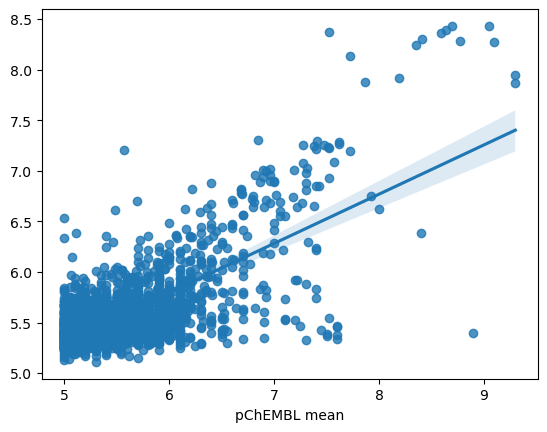

In [16]:
sns.regplot(x=y_test, y=y_pred)

In [17]:
from polaris_model_comparison import *

In [18]:
data_for_stats = pd.DataFrame()
thresh =6.

data_for_stats['pchembl'] = y_test
data_for_stats['pchembl_pred'] = y_pred
data_for_stats['fold'] = np.ones(len(y_test))
data_for_stats['method'] = np.ones(len(y_test))
data_for_stats['split'] = np.ones(len(y_test))
data_for_stats['cv_cycle'] = np.ones(len(y_test))
metrics = calc_regression_metrics(data_for_stats, "fold", "pchembl", "pchembl_pred", thresh)
metric_ls = metrics.columns[3:]

df_split = metrics.query("split == 1")
metrics

,cv_cycle,method,split,mae,mse,r2,rho,prec,recall
0,1.0,1.0,1.0,0.293678,0.169524,0.501773,0.470327,0.765625,0.463722


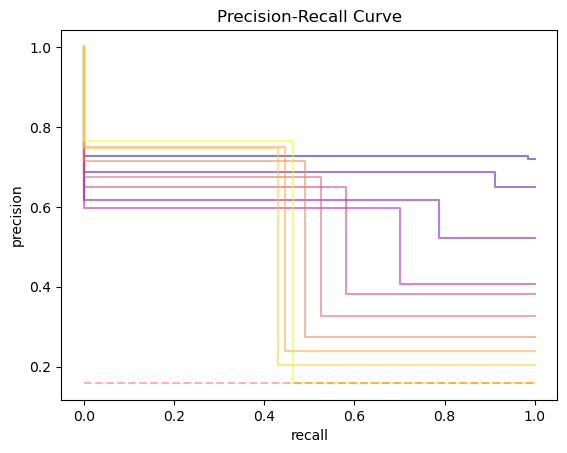

In [19]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import precision_recall_curve, auc
import numpy as np
from matplotlib import colormaps

ts = np.linspace(5.25, 6.0, 10)
colors = colormaps['plasma'](np.linspace(0, 1, 10))
aupr = []

for ind, t in enumerate(ts):
    random_state = np.random.RandomState(0)
    pred_class = data_for_stats["pchembl_pred"] > t
    true_class = data_for_stats["pchembl"] > t
    pre, rec, _ = precision_recall_curve(true_class, pred_class)
    baseline = np.sum(true_class) / len(true_class)

    plt.step(rec, pre, alpha=0.5, where='post', label='PR curve', color=colors[ind])
    aupr.append(auc(pre, rec))

plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Precision-Recall Curve')
plt.plot((0, 1), (baseline, baseline),'r--', alpha=0.3, label='baseline')

# only have one classification, need a function of the threshold


Text(0.5, 1.0, 'Area under PR curve vs Threshold')

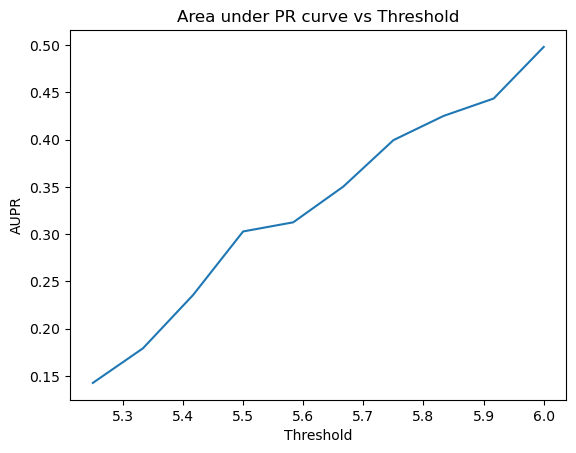

In [20]:
plt.plot(ts, aupr)
plt.xlabel("Threshold")
plt.ylabel("AUPR")
plt.title("Area under PR curve vs Threshold")

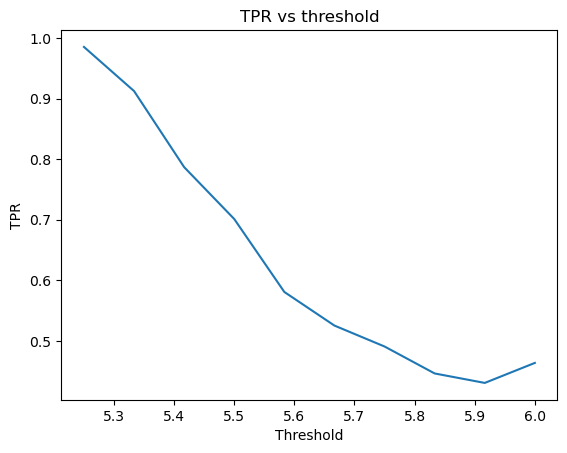

In [21]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import precision_recall_curve
import numpy as np

recs = []

for t in ts:
    random_state = np.random.RandomState(0)
    pred_class = data_for_stats["pchembl_pred"] > t
    true_class = data_for_stats["pchembl"] > t
    pre, rec, _ = precision_recall_curve(true_class, pred_class)
    
    recs.append(rec[1])


plt.xlabel('Threshold')
plt.ylabel('TPR')
plt.title('TPR vs threshold')
plt.plot(ts, recs, label='baseline')

# only have one classification, need a function of the threshold

In [22]:
# from scipy.stats import levene
# for metric in metric_ls:
#     groups = df_split.groupby('method')[metric].apply(list)
#     stat, pvalue = levene(*groups)
#     print(f'Levene test for {metric}: p-value = {pvalue}')
# variances_by_method = df_split.groupby('method')[metric_ls].var()
# max_fold_diff = variances_by_method.max() / variances_by_method.min()

In [23]:
# Need to check that the variances of the metrics are normal, but need splits for that

In [24]:
# df_scaffold_in = data_for_stats.query("split == 1")
# make_scatterplot(df_scaffold_in, "pchembl", "pchembl_pred", thresh=5.5, cycle_col="cv_cycle", group_col="method") 

In [25]:
from umap import UMAP
from typing import List
def visualize_chemspace(data: pd.DataFrame, split_names: List[str], mol_col: str = "CANONICAL_SMILES", size_col=None):
    figs = plt.figure(num=3)
    features = [dm.to_fp(mol) for mol in data[mol_col]]
    embedding = UMAP().fit_transform(features)
    data["UMAP_0"], data["UMAP_1"] = embedding[:, 0], embedding[:, 1]
    for split_name in split_names:
        plt.figure()
        fig = sns.scatterplot(data=data, x="UMAP_0", y="UMAP_1", style=size_col, hue=split_name, alpha=0.7)
        fig.set_title(f"UMAP Embedding of compounds for {split_name}")
    return figs

2025-02-18 17:44:44.626 | DEBUG    | splito.utils:get_kmeans_clusters:68 - To use KMeans with the jaccard metric, we use the Empirical Kernel Map
2025-02-18 17:44:51.718 | DEBUG    | splito.utils:get_kmeans_clusters:68 - To use KMeans with the jaccard metric, we use the Empirical Kernel Map
/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

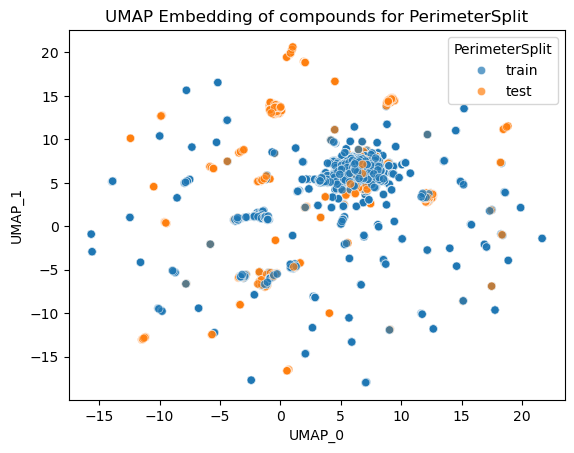

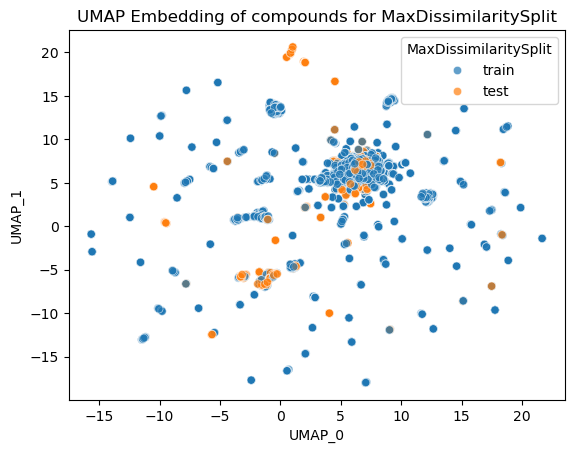

In [26]:
import pandas as pd
import splito
import splito.utils
import matplotlib.pyplot as plt
import os
import sys
from openadmet_models.split.scaffold import PerimeterSplit, MaxDissimilaritySplit


path = '../tests/test_data/CYP3A4_chembl_pchembl.csv'
data = pd.read_csv(path)

splitter = PerimeterSplit(n_jobs=-1, test_size=0.2, random_state=111)
train_idx, test_idx = next(splitter.split(X=data["CANONICAL_SMILES"].values))

data.loc[train_idx, splito.PerimeterSplit.__name__] = "train"
data.loc[test_idx, splito.PerimeterSplit.__name__] = "test"

splitter = MaxDissimilaritySplit(n_jobs=-1, test_size=0.2, random_state=111)
train_idx, test_idx = next(splitter.split(X=data["CANONICAL_SMILES"].values))
assert train_idx.shape[0] > test_idx.shape[0]

data.loc[train_idx, "MaxDissimilaritySplit"] = "train"
data.loc[test_idx, "MaxDissimilaritySplit"] = "test"

visualize_chemspace(data, split_names=["PerimeterSplit", "MaxDissimilaritySplit"])

2025-02-18 17:45:06.152 | DEBUG    | splito.utils:get_kmeans_clusters:68 - To use KMeans with the jaccard metric, we use the Empirical Kernel Map
2025-02-18 17:45:07.102 | DEBUG    | splito.utils:get_kmeans_clusters:68 - To use KMeans with the jaccard metric, we use the Empirical Kernel Map
/Users/dwwest/miniconda3/envs/openadmet_models/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

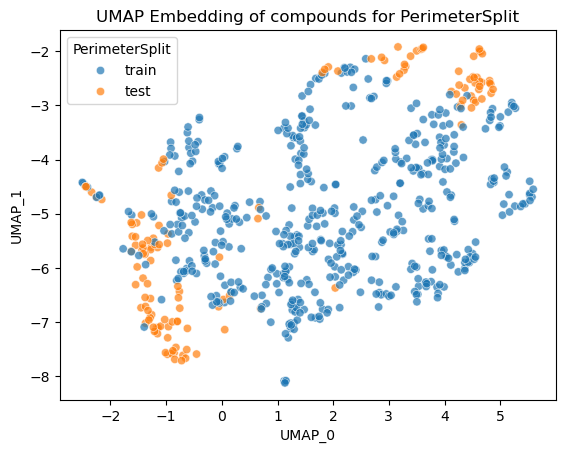

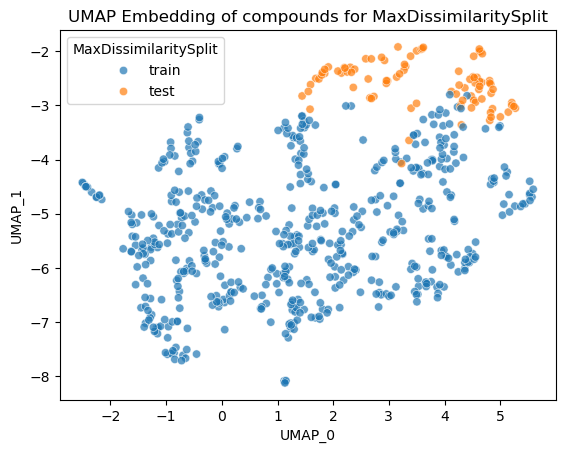

In [27]:
import datamol

data = dm.data.freesolv()


# # Define PerimeterSplit
# splitter = splito.PerimeterSplit(n_jobs=-1, test_size=0.2, random_state=111)
# train_idx, test_idx = next(splitter.split(X=data["smiles"].values))

# assert train_idx.shape[0] > test_idx.shape[0]

# data.loc[train_idx, splito.PerimeterSplit.__name__] = "train"
# data.loc[test_idx, splito.PerimeterSplit.__name__] = "test"


# # Define PerimeterSplit
# splitter = splito.MaxDissimilaritySplit(n_jobs=-1, test_size=0.2, random_state=111)
# train_idx, test_idx = next(splitter.split(X=data.smiles.values))
# assert train_idx.shape[0] > test_idx.shape[0]

# data.loc[train_idx, "MaxDissimilaritySplit"] = "train"
# data.loc[test_idx, "MaxDissimilaritySplit"] = "test"

# visualize_chemspace(data, split_names=["PerimeterSplit", "MaxDissimilaritySplit"], mol_col="smiles")

splitter = PerimeterSplit(n_jobs=-1, test_size=0.2, random_state=111)
train_idx, test_idx = next(splitter.split(X=data["smiles"].values))

data.loc[train_idx, splito.PerimeterSplit.__name__] = "train"
data.loc[test_idx, splito.PerimeterSplit.__name__] = "test"

splitter = MaxDissimilaritySplit(n_jobs=-1, test_size=0.2, random_state=111)
train_idx, test_idx = next(splitter.split(X=data["smiles"].values))
assert train_idx.shape[0] > test_idx.shape[0]

data.loc[train_idx, "MaxDissimilaritySplit"] = "train"
data.loc[test_idx, "MaxDissimilaritySplit"] = "test"

visualize_chemspace(data, split_names=["PerimeterSplit", "MaxDissimilaritySplit"], mol_col="smiles")